In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
simple_reconstruction = torch.load('simple_reconstruction.pt')
cross_generation = torch.load('cross_generation.pt')
joint_generation = torch.load('joint_generation.pt')

rec1_all_prime = np.load('rec1_all_prime.npy')
rec2_all_prime = np.load('rec2_all_prime.npy')
rec1_all       = np.load('rec1_all.npy')
rec2_all       = np.load('rec2_all.npy')
res1_green     = np.load('res1_green.npy')
res2_green     = np.load('res2_green.npy')
res1_green_prime = np.load('res1_green_prime.npy')
res2_green_prime = np.load('res2_green_prime.npy')
video_data_third = np.load('video_data_third.npy')
wfield_data_third = np.load('wfield_data_third.npy')


In [3]:
joint_generation_numpy      = joint_generation.cpu().detach().numpy()
cross_generation_numpy      = cross_generation.cpu().detach().numpy()
simple_reconstruction_numpy = simple_reconstruction.cpu().detach().numpy()

In [12]:
np.save('simple_reconstruction_numpy.npy',simple_reconstruction_numpy)
np.save('cross_generation_numpy.npy',cross_generation_numpy)
np.save('joint_generation_numpy.npy',joint_generation_numpy)


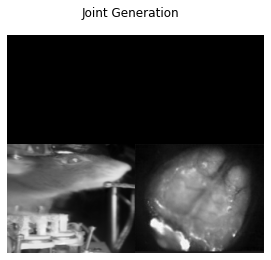

In [4]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=-0.38)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Joint Generation')
ax1.imshow(joint_generation_numpy[0,1,:,:],'gray')
ax2.imshow(joint_generation_numpy[2,1,:,:],'gray')
ax3.imshow(joint_generation_numpy[1,1,:,:],'gray')
ax4.imshow(joint_generation_numpy[3,1,:,:],'gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

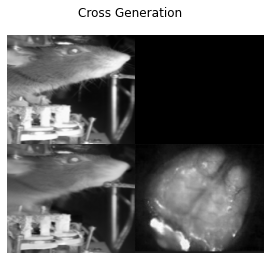

In [5]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=-0.38)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Cross Generation')
ax1.imshow(cross_generation_numpy[0,1,:,:],'gray')
ax2.imshow(cross_generation_numpy[2,1,:,:],'gray')
ax3.imshow(cross_generation_numpy[1,1,:,:],'gray')
ax4.imshow(cross_generation_numpy[3,1,:,:],'gray')
plt.ylabel('Cross Generation')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

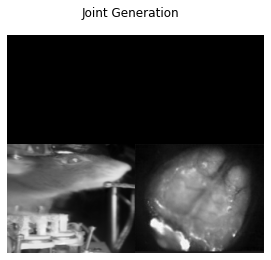

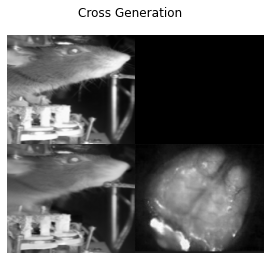

In [6]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=-0.38)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Joint Generation')
ax1.imshow(joint_generation_numpy[0,1,:,:],'gray')
ax2.imshow(joint_generation_numpy[2,1,:,:],'gray')
ax3.imshow(joint_generation_numpy[1,1,:,:],'gray')
ax4.imshow(joint_generation_numpy[3,1,:,:],'gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

fig = plt.figure()

gs = fig.add_gridspec(2, 2, hspace=0, wspace=-0.38)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Cross Generation')
ax1.imshow(cross_generation_numpy[0,1,:,:],'gray')
ax2.imshow(cross_generation_numpy[2,1,:,:],'gray')
ax3.imshow(cross_generation_numpy[1,1,:,:],'gray')
ax4.imshow(cross_generation_numpy[3,1,:,:],'gray')
plt.ylabel('Cross Generation')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

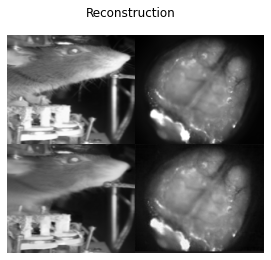

In [8]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=-0.38)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Reconstruction')
ax1.imshow(simple_reconstruction_numpy[0,1,:,:],'gray')
ax2.imshow(simple_reconstruction_numpy[2,1,:,:],'gray')
ax3.imshow(simple_reconstruction_numpy[1,1,:,:],'gray')
ax4.imshow(simple_reconstruction_numpy[3,1,:,:],'gray')
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

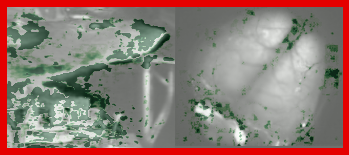

In [9]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.imshow(res1_green,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax1.imshow(rec1_all[2,:,:],'gray',alpha=.6)
ax2.imshow(res2_green,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax2.imshow(rec2_all[2,:,:],'gray',alpha=.6)
ax1.axis('off')
ax2.axis('off')
fig.patch.set_facecolor('xkcd:red')
plt.show()

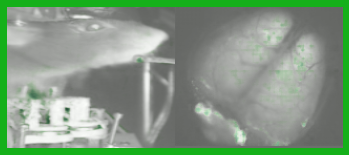

In [10]:
fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
ax1.imshow(res1_green_prime,cmap=plt.cm.Greens,alpha=1)
ax1.imshow(rec1_all_prime[2,:,:],'gray',alpha=.6)
ax2.imshow(res2_green_prime,cmap=plt.cm.Greens,alpha=1)
ax2.imshow(rec2_all_prime[2,:,:],'gray',alpha=.6)
ax1.axis('off')
ax2.axis('off')
fig.patch.set_facecolor('xkcd:green')
plt.show()

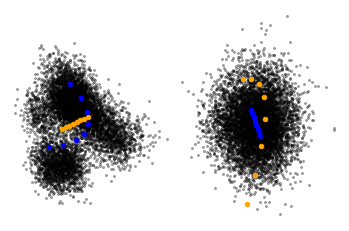

In [8]:
alpha = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2]
alpha_size = len(alpha)
def pca_plot_complete(data,alpha_size,ax):
    pca = PCA(n_components=2)
    pca.fit(data)
    X_pca = pca.transform(data)
    ax.scatter(X_pca[:, 0], X_pca[:, 1],alpha=0.3, cmap="Spectral", s=4,color='k')
    ax.axis('off')
    for i in range(0,alpha_size):
        ax.scatter(X_pca[i, 0], X_pca[i, 1],cmap="Spectral",  s=20, marker = 'o',color='orange')
    for i in range(alpha_size,2*alpha_size):
        ax.scatter(X_pca[i, 0], X_pca[i, 1],cmap="Spectral",  s=20, marker = 'o',color='blue')

fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
pca_plot_complete(video_data_third,alpha_size,ax1)
pca_plot_complete(wfield_data_third,alpha_size,ax2)

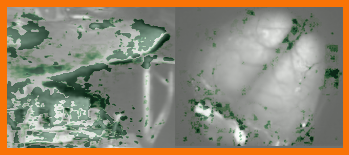

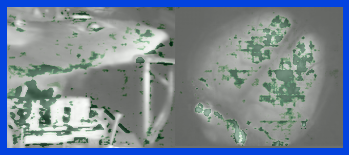

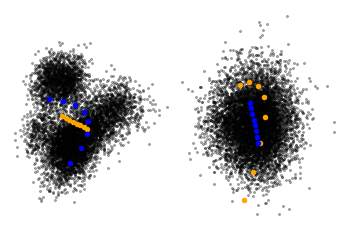

In [9]:
fig1 = plt.figure()
gs1 = fig1.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs1.subplots(sharex='col', sharey='row')
ax1.imshow(res1_green,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax1.imshow(rec1_all[2,:,:],'gray',alpha=.6)
ax2.imshow(res2_green,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax2.imshow(rec2_all[2,:,:],'gray',alpha=.6)
fig1.patch.set_facecolor('xkcd:orange')
fig2 = plt.figure()
gs2 = fig2.add_gridspec(1, 2, wspace=0)
(ax3, ax4) = gs2.subplots(sharex='col', sharey='row')
ax3.imshow(res1_green_prime,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax3.imshow(rec1_all_prime[2,:,:],'gray',alpha=.6)
ax4.imshow(res2_green_prime,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax4.imshow(rec2_all_prime[2,:,:],'gray',alpha=.6)
fig2.patch.set_facecolor('xkcd:blue')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

fig3 = plt.figure()
gs3 = fig3.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs3.subplots(sharex='col', sharey='row')
pca_plot_complete(video_data_third,alpha_size,ax1)
pca_plot_complete(wfield_data_third,alpha_size,ax2)

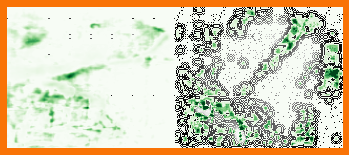

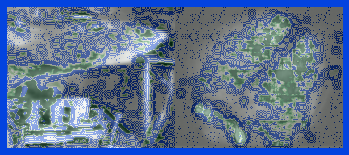

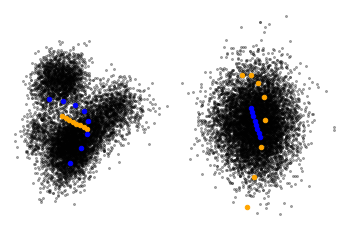

In [66]:
fig1 = plt.figure()
gs1 = fig1.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs1.subplots(sharex='col', sharey='row')

# my_cm = plt.cm.get_cmap("hot").copy()
# my_cm.set_under('k', alpha=0)
# x.set_clim([1,5])
ax1.imshow(rec1_all[2,:,:],'gray')
ax1.imshow(res1_green,cmap=plt.cm.Greens)
ax2.imshow(rec2_all[2,:,:],'gray',alpha=1)
ax2.imshow(res2_green,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
fig1.patch.set_facecolor('xkcd:orange')

fig2 = plt.figure()
gs2 = fig2.add_gridspec(1, 2, wspace=0)
(ax3, ax4) = gs2.subplots(sharex='col', sharey='row')
ax3.imshow(res1_green_prime,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax3.imshow(rec1_all_prime[2,:,:],'gray',alpha=.6)
ax4.imshow(res2_green_prime,cmap=plt.cm.Greens,alpha=1, interpolation = 'sinc', vmin = 0, vmax = 0.1)
ax4.imshow(rec2_all_prime[2,:,:],'gray',alpha=.6)
fig2.patch.set_facecolor('xkcd:blue')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
plt.show()

fig3 = plt.figure()
gs3 = fig3.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs3.subplots(sharex='col', sharey='row')
pca_plot_complete(video_data_third,alpha_size,ax1)
pca_plot_complete(wfield_data_third,alpha_size,ax2)

In [11]:
import matplotlib
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.sans-serif'] = "Computer Modern Sans Serif"
sns.set_context('talk')
frame2 = np.load('rec1_all.npy')
overlap = np.load('res1_green.npy')
plt.figure()
my_cm = plt.cm.Greens
my_cm.set_under('w', alpha=0)
plt.imshow(frame2[2,:,:], cmap=plt.cm.gray) #, alpha=0.6)
plt.imshow(overlap, cmap=my_cm)
_, cl = plt.gci().get_clim()
print(plt.gci().get_clim())
plt.clim([cl*4e-2,cl*0.8])
plt.gca().set_xticks([],[])
plt.gca().set_yticks([],[])
plt.colorbar()
plt.show()

(0.0, 1.336562)


<ipython-input-11-928ac25a96c0>:15: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Greens").copy()
  my_cm.set_under('w', alpha=0)


TypeError: set_ticks() takes 2 positional arguments but 3 were given

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/achint/.cache/matplotlib/tex.cache/8aa7725eecb2676b680364066868dbc3.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)

! LaTeX Error: File `type1ec.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.6 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on 8aa7725eecb2676b680364066868dbc3.log.




<Figure size 432x288 with 1 Axes>

In [ ]:
zip fil

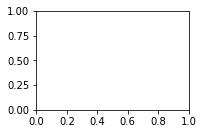

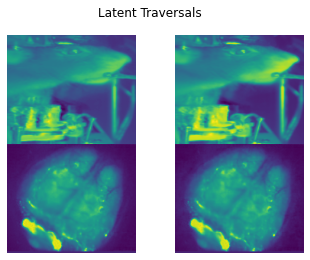

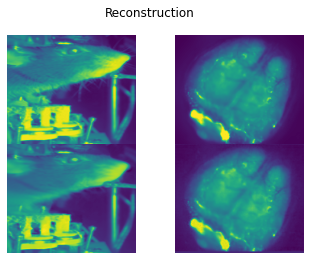

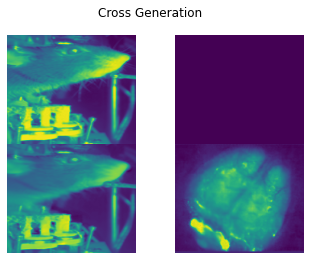

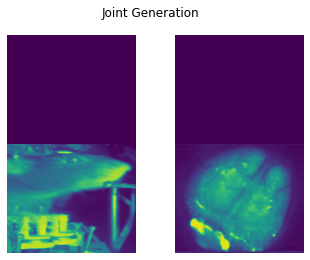

In [54]:
plt.subplot(2, 2, 1)
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Latent Traversals')
ax1.imshow(latent_traversal_numpy[0,1,:,:])
ax2.imshow(latent_traversal_numpy[2,1,:,:])
ax3.imshow(latent_traversal_numpy[350,1,:,:])
ax4.imshow(latent_traversal_numpy[420,1,:,:])
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

plt.subplot(2, 2, 2)
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Reconstruction')
ax1.imshow(simple_reconstruction_numpy[0,1,:,:])
ax2.imshow(simple_reconstruction_numpy[2,1,:,:])
ax3.imshow(simple_reconstruction_numpy[1,1,:,:])
ax4.imshow(simple_reconstruction_numpy[3,1,:,:])
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

plt.subplot(2, 2, 3)
fig = plt.figure()

gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Cross Generation')
ax1.imshow(cross_generation_numpy[0,1,:,:])
ax2.imshow(cross_generation_numpy[2,1,:,:])
ax3.imshow(cross_generation_numpy[1,1,:,:])
ax4.imshow(cross_generation_numpy[3,1,:,:])
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()

plt.subplot(2, 2, 4)
fig = plt.figure()

gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Joint Generation')
ax1.imshow(joint_generation_numpy[0,1,:,:])
ax2.imshow(joint_generation_numpy[2,1,:,:])
ax3.imshow(joint_generation_numpy[1,1,:,:])
ax4.imshow(joint_generation_numpy[3,1,:,:])
ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()
ax4.set_axis_off()